# Lab 1: Reminder on Markov Chain - Stochastic gradient descent

---
## Computational statistics lab 1
## Author: Clément Bonnet
## Date: 18/10/2020

***

## Exercise 1: Box-Muller and Marsaglia-Bray algorithm

$$
\begin{align}
\Theta
&\sim U(0;2\pi) \\
R
&\sim Rayleigh(1) \\
\end{align}
$$
$$
\forall r \in \mathbb{R},  f_R(r) = r\exp\Big(-\frac{r^2}{2}\Big) \mathbb{1}_{\mathbb{R}^+}(r)
$$

### $1.$ Prove that both X and Y have $N(0,1)$ distribution and are independent.
$$
\begin{align}
X &= Rcos(\Theta) \\
Y &= Rsin(\Theta)
\end{align}
$$

$$
\begin{align}
\forall h,\ E[h(X,Y)]
&= \int_0^{\infty}\int_0^{2\pi} h(r\cos(\theta),r\sin(\theta))re^{-\frac{r^2}{2}}\frac{1}{2\pi} dr d\theta \\
&= \int_{\mathbb{R}^2}\frac{1}{2\pi}h(x,y)e^{-\frac{x^2+y^2}{2}}dxdy \\
&= E[h(N_1,N_2)]
\end{align}
$$

$$
\begin{pmatrix}N_1\\N_2\end{pmatrix} \sim N\bigg(\begin{pmatrix}0\\0\end{pmatrix}, I_2\bigg)
$$
$X$ and $Y$ are independant since they are Gaussian and their correlation is null.

### $2.$ Write an algorithm that samples independent Gaussian distribution $N(0,1)$.

- Simulate $\Theta \sim U(0,2\pi)$ -> easy
- Simulate $R \sim Rayleigh(1)$ -> hard
- Compute $(R\cos(\Theta),R\sin(\Theta))$ -> easy

One can simulate $R \sim Rayleigh(1)$ using its inverse cumulative distribution function applied to a variable following a uniform distribution.

$$
\begin{align}
F_R(r)
&= \int_{-\infty}^r\mathbb{1}_{t \ge 0}te^{-\frac{t^2}{2}}dt \\
&= 1 - e^{-\frac{r^2}{2}}
\end{align}
$$

$$
u = 1 - e^{-\frac{r^2}{2}} \iff r = \sqrt{-2\ln(1-u)}
$$

$$
U \sim U(0,1) \implies \sqrt{-2\ln(U)} \sim Rayleigh(1)
$$

Therefore, the final algorithm is:
- Simulate $\Theta \sim U(0,2\pi)$
- Simulate $U \sim U(0,1)$
- Compute $\boxed{\begin{pmatrix}N_1\\N_2\end{pmatrix} = \begin{pmatrix}\sqrt{-2\ln(U)}\cos(\Theta)\\\sqrt{-2\ln(U)}\sin(\Theta)\end{pmatrix} \sim N\bigg(\begin{pmatrix}0\\0\end{pmatrix}, I_2\bigg)}$

### $3.$ Marsaglia-Bray algorithm.

#### a) Distribution of $(V_1, V_2)$.

At the end of the "while" loop, $(V_1, V_2) \sim U(circle)$ 

#### b) Show $T$ and $V$ are independent and give their laws. 

$$
T = \frac{V_1}{\sqrt{V_1^2 + V_2^2}} \quad \textrm{and} \quad  V = V_1^2 + V_2^2
$$

With a change of variable:
$
\begin{cases}
    t &= \frac{v_1}{v_1^2 + v_2^2}\\
    v &= v_1^2 + v_2^2
\end{cases}
\iff
\begin{cases}
    v_1 &= t\sqrt{v}\\
    v_2 &= \sqrt{v}\sqrt{1-t^2}
\end{cases}
\quad ,
$
$$
\begin{align}
\forall h,\ E[h(T,V)]
&= 2\int_{_1}^1\int_0^1\frac{1}{\pi}h(t,v)|J|dtdv
\end{align}
$$

$$
\begin{cases}
    dv_1 &= \sqrt{v}dt + \frac{t}{2\sqrt{v}}dv \\
    dv_2 &= \frac{-t}{\sqrt{1-t^2}}\sqrt{v}dt + \frac{\sqrt{1-t^2}}{2\sqrt{v}}dv \\
\end{cases}
\textrm{Jacobian determinant: } |J| = \frac{1}{2\sqrt{1-t^2}}
$$

Therefore,
$$
\forall h,\ E[h(T,V)]
= \int_{_1}^1\int_0^1\frac{1}{\pi}h(t,v)\frac{1}{\sqrt{1-t^2}}dtdv
$$

$$
f_{T,V}(t,v) = \mathbb{1}_{[0,1]}(v) . \frac{1}{\pi\sqrt{1-t^2}}\mathbb{1}_{[-1,1]}(t) = f_V(v).f_T(t)
$$

It is clear that $V$ and $T$ are independant and $V \sim U(0,1)$. What is the law of $T$ on $[-1,1]$?

$$
\begin{align}
\forall h,\ E[h(T)]
&= \int_{-1}^1\frac{1}{\pi\sqrt{1-t^2}}h(t)dt \\
&= \int_0^\pi \frac{1}{\pi} h(\cos(\theta))d\theta \\
&= \int_0^{2\pi} \frac{1}{2\pi} h(\cos(\theta))d\theta \\
\end{align}
$$

The law of $T$ is the law of $\cos(\Theta)$ with $\Theta \sim U(0,2\pi)$.

#### c) Distribution of $(X,Y)$? 

$$
\begin{cases}
    X &= ST\\
    Y &= S\sqrt{1-T^2}
\end{cases}
\iff
\begin{cases}
    X &= \sqrt{-2\ln(V)}\cos(\Theta)\\
    Y &= \sqrt{-2\ln(V)}\sin(\Theta)
\end{cases}
$$

Since $V \sim U(0,1)$ and $\Theta \sim U(0,2\pi)$, as it was done in question $1$, one can conclude that:

$$
\boxed{\begin{pmatrix}X\\Y\end{pmatrix} \sim N\bigg(\begin{pmatrix}0\\0\end{pmatrix}, I_2\bigg)}
$$

#### d) Acceptance probability of the test of the "while" loop?

$$
p = \frac{A(B(0,1)}{A([-1,1]*[-1,1])} = \frac{\pi}{4}
$$

In [1]:
import math
print("The acceptance probability is {:.3f}".format(math.pi/4))

The acceptance probability is 0.785


***

## Exercise 3: Stochastic Gradient Learning in Neural Networks

### $1.$ Stochastic gradient descent algorithm.

The goal is to minimize the expected risk:

$$
R(w) = E[J(w, z)] \\
\textrm{with}\quad J(w, z) = \frac{1}{2}(w^Tx - y)^2
$$

Computing the expected value is often tricky or computational intensive. Hence, one can approach the expected risk with a Monte Carlo approach over the examples in the training set.

$$
R(w) \approx \frac{1}{n} \sum_{i=1}^nl(x_i,y_i)
$$

With $l(x_i, y_i) = \frac{1}{2}(w^Tx_i - y_i)^2$. <br>
The stochastic gradient descent algorithm samples individual or batches of observations $(x_i, y_i)$ and tune $w$ in the direction of a decrease of $l(x_i, y_i)$.

$$
w_{k+1} = w_k - \alpha_k\nabla_wl(x_i, y_i)
$$

$(w_k)_{k \in \mathbb{N}}$ will converge to $w^* = \min_{w} R(w)$, assuming the learning rate $\alpha_k$ decays over time and verifies the following properties:

$$
\begin{align}
\sum_k \alpha_k &= +\infty \\
\sum_k \alpha_k^2 &\lt \infty
\end{align}
$$

$\alpha_k = \frac{\alpha}{k}$ is a good theoretical candidate.

Here, in a linear classification context, $\nabla_wl(x_i, y_i) = (w^Tx_i - y_i)x_i$

Hence, the gradient descent step is the following: $\boxed{w_{k+1} = w_k - \frac{\alpha}{k}(w^Tx_i - y_i)x_i}$

The algorithm keeps updating the value until a stopping criteria is met. For instance, one can track the update in weights and stop when it is too small. Let us now implement the algorithm in Python.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [3]:
def gradient_step(X, Y, alpha, w, k, k_z):
    """
    Implemented using Numpy arrays.
    Returns the updated parameter vector after taking one stochastic gradient step.
    """
    i = np.random.choice(X.shape[0])
    return w - alpha/(k+k_z)*(w.transpose()@X[i,:] - Y[i])*X[i,:]

def loss_fn(X, Y, w):
    """
    Returns the loss function for the dataset. Equivalent to the empirical risk.
    """
    return 1/(X.shape[0])*np.linalg.norm(Y-X@w)**2
    
def stochastic_gradient_descent(X, Y, alpha, tol=10**-5, k_z=10, verbose=True, print_iter=1000):
    """
    X is a Numpy arrays of shape (nb_observations, nb_features) containing the data set.
    Y is a Numpy arrays of shape (nb_observations,) containing the labels.
    Returns the optimized weights w that fit the training set X to the labels Y.
    """
    w = np.zeros(X.shape[1]) # initialization of weights
    stop = False         # stopping criterion
    loss = loss_fn(X, Y, w)
    if verbose: print("Iteration 0, loss: {:.5f}".format(loss))
    it = 0
    while not stop:
        it += 1
        w = gradient_step(X, Y, alpha, w, k=it, k_z=k_z)   # taking one stochastic gradient descent step
        if it % print_iter == 0:
            prev_loss = loss
            loss = loss_fn(X, Y, w)
            if verbose: print("Iteration {}, loss: {:.5f}".format(it, loss))
            if abs(loss - prev_loss) < tol*prev_loss:    # if the loss is rouglhy the same after 1000 iterations, the algorithm stops
                stop = True
    return w

### $2.$ Creation of a data set.

In [4]:
def dataset(n):
    """
    Creates a random dataset in R^2 and a random hyperplane that linearly
    separate the datasets in two classes.
    Returns (X, Y, w): the dataset X, the labels Y and the normal vector of
    the separating hyperplane w.
    """
    X = 2*np.random.rand(n,2) - 1   # generates n points in [-1,1]^2
    w = 2*np.random.rand(2) - 1     # generates a random normal vector
    Y = 2*(X@w > 0).astype(int) - 1 # generates labels depending on the hyperplane
    return (X, Y, w)

In [5]:
# Dataset generation
n = 100
X, Y, w = dataset(n)

In [6]:
def visualization(X, Y, w, linestyle="solid"):
    colors = ["red", "green"]
    markers = ["o", "+"]
    labels = [-1,1]
    for color, marker, label in zip(colors, markers, labels):
        plt.scatter(X[:,0][Y==label], X[:,1][Y==label], c=color, marker=marker)
    plt.plot(np.linspace(-1,1,2), np.linspace(-1,1,2)*(-w[0]/w[1]), linestyle=linestyle, linewidth=3)
    plt.ylim(-1, 1);

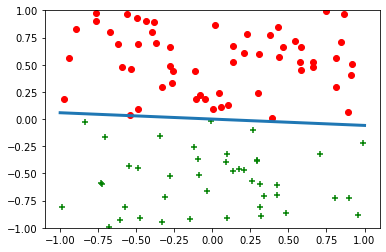

In [7]:
# Visualization of the dataset
visualization(X, Y, w)

### $3.$ Test of the stochastic gradient descent algorithm.

In [8]:
# stochastic gradient algorithm on X and Y with a learning rate of 1/k
w_est = stochastic_gradient_descent(X, Y, alpha=1, tol=10**-6, verbose=False)

In [9]:
w_est_norm = w_est/np.linalg.norm(w_est)
w_norm = w/np.linalg.norm(w)
# Difference between estimated w and real w
np.linalg.norm(w_est_norm - w_norm)

0.019004296537311467

The difference between the estimated $w^*$ and the real $\bar w$ is very small.

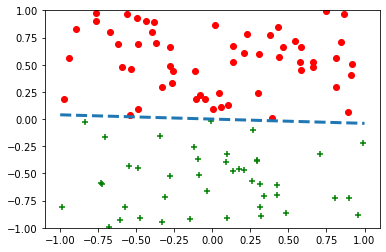

In [10]:
# Visualization of the estimated w
visualization(X, Y, w_est, linestyle="dashed")

The vector $w^*$ learnt by the stochastic gradient descent algorithm is capable of separating the dataset as $\bar w$ is able to.

### $4.$ Adding Gaussian noise to the dataset.

In [11]:
# Adding Gaussian noise to current dataset
sigma = 0.2  # variance of the noise
X = X + sigma*np.random.randn(*X.shape)

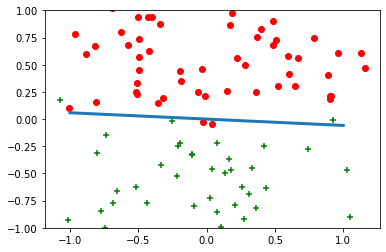

In [12]:
visualization(X, Y, w)

In [13]:
# stochastic gradient algorithm on X and Y with a learning rate of 1/k
w_est = stochastic_gradient_descent(X, Y, alpha=1, tol=10**-6, verbose=False)

In [14]:
w_est_norm = w_est/np.linalg.norm(w_est)
w_norm = w/np.linalg.norm(w)
# Difference between estimated w and real w
np.linalg.norm(w_est_norm - w_norm)

0.010051032805105463

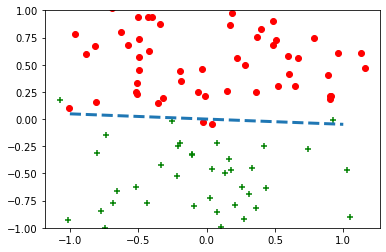

In [15]:
# Visualization of the estimated w
visualization(X, Y, w_est, linestyle="dashed")

Even with noisy data, the algorithm manages to approach the oracle value $\bar w$ of $w$, finding a good estimated value $w^*$.

### $5.$ Breast Cancer Wisconsin Data Set.

In [16]:
# loading the dataset
df = pd.read_csv("wdbc.data", header=None).set_index(0)

In [17]:
X, Y = df.drop(columns=1), 2*((df[1]=="M").astype(int))-1

In [18]:
X_norm = (X - X.mean()) / (X.max() - X.min())

In [19]:
X = X.to_numpy()
Y = Y.to_numpy()
X.shape, Y.shape

((569, 30), (569,))

In [20]:
w = stochastic_gradient_descent(X, Y, alpha=0.00001, tol=10**-6, verbose=False)

In [21]:
# metrics functions

def prediction(X, w):
    return 2*((X@w > 0).astype(int)) - 1

def accuracy(X, Y, w):
    acc = prediction(X, w) == Y
    return sum(acc)/len(acc)

In [22]:
md("Accuracy on the training set: **{:.1f}%**".format(100*accuracy(X, Y, w)))

Accuracy on the training set: **90.3%**